In [1]:
import pandas as pd

In [9]:
main_df = pd.read_csv('normalized_human_biopsy_counts.csv')

In [10]:
main_df

,gene_symbol,HealthyLungBiopsy_2,HealthyLungBiopsy_1,COVID19Lung_2,COVID19Lung_1
0,DDX11L1,0,0,0,0
1,WASH7P,261,140,0,0
2,FAM138A,0,0,0,0
3,FAM138F,0,0,0,0
4,OR4F5,0,0,0,0
...,...,...,...,...,...
21792,CDY1B,0,0,0,0
21793,CDY1,0,0,0,0
21794,CSPG4P1Y,0,0,0,0
21795,GOLGA2P3Y,0,0,0,0


In [11]:
main_df.dtypes

gene_symbol            object
HealthyLungBiopsy_2     int64
HealthyLungBiopsy_1     int64
COVID19Lung_2           int64
COVID19Lung_1           int64
dtype: object

# All only 0 values deleted

In [245]:
main_non0_df = main_df.loc[~(main_df == 0).any(axis=1)]; main_non0_df

,gene_symbol,HealthyLungBiopsy_2,HealthyLungBiopsy_1,COVID19Lung_2,COVID19Lung_1
20,ISG15,1398,4081,2231,324
21,AGRN,648,795,45,1
30,SDF4,2091,2593,49,8
39,AURKAIP1,1900,1874,22,1
40,CCNL2,4966,5361,1,2
...,...,...,...,...,...
21684,FUNDC2,1916,3898,22,4
21690,CLIC2,771,4824,86,3
21698,RPS4Y1,5958,10013,113,9
21757,CD24,281,1740,71,4


In [114]:
Healthy_df = main_non0_df.copy(); Healthy_df =  Healthy_df.drop(['COVID19Lung_2', 'COVID19Lung_1', 'gene_symbol'], axis=1); Healthy_df

,HealthyLungBiopsy_2,HealthyLungBiopsy_1
20,1398,4081
21,648,795
30,2091,2593
39,1900,1874
40,4966,5361
...,...,...
21684,1916,3898
21690,771,4824
21698,5958,10013
21757,281,1740


In [115]:
COVID_df = main_non0_df.copy(); COVID_df = COVID_df.drop(['HealthyLungBiopsy_1', 'HealthyLungBiopsy_2', 'gene_symbol'], axis = 1); COVID_df

,COVID19Lung_2,COVID19Lung_1
20,2231,324
21,45,1
30,49,8
39,22,1
40,1,2
...,...,...
21684,22,4
21690,86,3
21698,113,9
21757,71,4


# p value from two tailed ttest

In [65]:
import numpy as np
from scipy import stats

In [140]:
Healthy_df_list = Healthy_df.values.tolist(); Healthy_df_list


[[1398, 4081],
 [648, 795],
 [2091, 2593],
 [1900, 1874],
 [4966, 5361],
 [1496, 2141],
 [2621, 2585],
 [1312, 1380],
 [9491, 14572],
 [1798, 3523],
 [7614, 7401],
 [722, 2531],
 [1294, 3791],
 [4273, 3848],
 [3333, 5177],
 [15919, 103654],
 [3018, 3079],
 [1445, 1215],
 [452, 21],
 [906, 1529],
 [2069, 4975],
 [303, 537],
 [1098, 1727],
 [237, 331],
 [964, 1861],
 [989, 1257],
 [324, 294],
 [2716, 6790],
 [998, 2981],
 [861, 3458],
 [1622, 2977],
 [1520, 3832],
 [1174, 1597],
 [3062, 5141],
 [1771, 4296],
 [1395, 2508],
 [123, 131],
 [193, 18],
 [1715, 3314],
 [1958, 11810],
 [588, 1407],
 [1178, 2689],
 [5739, 6218],
 [1237, 1763],
 [1880, 17],
 [1116, 639],
 [266, 33],
 [1646, 738],
 [2407, 4343],
 [2336, 4832],
 [547, 1325],
 [1754, 582],
 [412, 1101],
 [5466, 11272],
 [5820, 3422],
 [1324, 1240],
 [4219, 3569],
 [2559, 4238],
 [28399, 35252],
 [453, 324],
 [93, 160],
 [1500, 3239],
 [6443, 17477],
 [345, 937],
 [1874, 4618],
 [888, 1185],
 [8356, 14133],
 [454, 447],
 [2886, 994],

In [141]:
COVID_df_list = COVID_df.values.tolist(); COVID_df_list


[[2231, 324],
 [45, 1],
 [49, 8],
 [22, 1],
 [1, 2],
 [4, 6],
 [117, 5],
 [120, 10],
 [716, 53],
 [10, 2],
 [225, 11],
 [3, 1],
 [136, 6],
 [74, 4],
 [69, 10],
 [463, 37],
 [59, 3],
 [18, 1],
 [6, 4],
 [39, 3],
 [175, 16],
 [4, 2],
 [67, 3],
 [19, 4],
 [23, 2],
 [14, 4],
 [1, 2],
 [40, 8],
 [42, 1],
 [104, 10],
 [262, 10],
 [41, 3],
 [1, 1],
 [86, 7],
 [36, 1],
 [18, 5],
 [131, 13],
 [26, 8],
 [15, 1],
 [60, 3],
 [18, 2],
 [23, 1],
 [574, 54],
 [113, 2],
 [18, 4],
 [63, 3],
 [205, 27],
 [3, 1],
 [52, 4],
 [67, 2],
 [70, 1],
 [377, 58],
 [4, 2],
 [588, 45],
 [170, 27],
 [433, 54],
 [503, 68],
 [64, 4],
 [879, 87],
 [21, 5],
 [6, 4],
 [43, 9],
 [781, 31],
 [3, 2],
 [342, 20],
 [11, 1],
 [2138, 216],
 [5, 4],
 [103, 21],
 [23, 1],
 [58, 4],
 [31, 1],
 [19, 1],
 [21, 1],
 [50, 1],
 [15, 1],
 [2, 2],
 [85, 6],
 [1853, 85],
 [11033, 932],
 [280, 15],
 [18, 2],
 [42, 4],
 [48, 4],
 [96, 13],
 [4, 1],
 [13, 1],
 [1, 1],
 [24, 6],
 [12, 6],
 [32, 2],
 [145, 4],
 [546, 50],
 [18, 5],
 [6, 2],
 [

In [131]:
def ttest_list(Healthy_df_list, COVID_df_list):
    test_result = []
    i=0
    for i in range(len(Health_df_list)):
        test_result.append(scipy.stats.ttest_ind(Healthy_df_list[i], COVID_df_list[i]))
        i+=1
    return test_result

In [132]:
tresult = ttest_list(Healthy_df_list, COVID_df_list); tresult

[Ttest_indResult(statistic=0.8883009872477248, pvalue=0.4681002764057729),
 Ttest_indResult(statistic=9.104310456556323, pvalue=0.011850378734099717),
 Ttest_indResult(statistic=9.186542849472731, pvalue=0.011642847488900621),
 Ttest_indResult(statistic=112.23297565169845, pvalue=7.937931217788051e-05),
 Ttest_indResult(statistic=26.136625103082118, pvalue=0.001460658322697302),
 Ttest_indResult(statistic=5.6232287808893, pvalue=0.030199586400548716),
 Ttest_indResult(statistic=43.21529647834182, pvalue=0.0005350278118070152),
 Ttest_indResult(statistic=19.811120792517727, pvalue=0.0025382007351976025),
 Ttest_indResult(statistic=4.5459924920951345, pvalue=0.04513755100910479),
 Ttest_indResult(statistic=3.077648062437824, pvalue=0.09134097138429495),
 Ttest_indResult(statistic=48.947552512307496, pvalue=0.0004171250188203337),
 Ttest_indResult(statistic=1.7960188028482036, pvalue=0.21433152736645394),
 Ttest_indResult(statistic=1.9768981111709327, pvalue=0.1866838299407832),
 Ttest_in

In [133]:
pvalue = []
for i in range(len(tresult)):
    pvalue.append(tresult[i][1])
    i+=1

In [134]:
pvalue

[0.4681002764057729,
 0.011850378734099717,
 0.011642847488900621,
 7.937931217788051e-05,
 0.001460658322697302,
 0.030199586400548716,
 0.0005350278118070152,
 0.0025382007351976025,
 0.04513755100910479,
 0.09134097138429495,
 0.0004171250188203337,
 0.21433152736645394,
 0.1866838299407832,
 0.0028556364513257844,
 0.04469967818040838,
 0.30759343276804074,
 0.0001882161888602888,
 0.00753965815976015,
 0.3951194601802921,
 0.06177053608064472,
 0.1427307544934305,
 0.0705038172271994,
 0.048839974448207,
 0.029177319921756973,
 0.0891647511360741,
 0.014181680951223132,
 0.0023737014031949793,
 0.14598759170055006,
 0.1856364331212012,
 0.2470456412817734,
 0.0882336845386712,
 0.148602522764019,
 0.022550093509548993,
 0.05995298332715998,
 0.13957700906784654,
 0.07335672945922136,
 0.45052175661443417,
 0.4203011860270518,
 0.08845750528538927,
 0.29875203348704094,
 0.13743606719692386,
 0.12604584947463376,
 0.003871869517876507,
 0.033012022961841914,
 0.420189343140287,
 0.

# Average gene expression per pair of Lungs

In [142]:
AvgHealthy = []
for values in Healthy_df_list:
    AvgHealthy.append((values[0] + values[1])/2)
AvgHealthy

[2739.5,
 721.5,
 2342.0,
 1887.0,
 5163.5,
 1818.5,
 2603.0,
 1346.0,
 12031.5,
 2660.5,
 7507.5,
 1626.5,
 2542.5,
 4060.5,
 4255.0,
 59786.5,
 3048.5,
 1330.0,
 236.5,
 1217.5,
 3522.0,
 420.0,
 1412.5,
 284.0,
 1412.5,
 1123.0,
 309.0,
 4753.0,
 1989.5,
 2159.5,
 2299.5,
 2676.0,
 1385.5,
 4101.5,
 3033.5,
 1951.5,
 127.0,
 105.5,
 2514.5,
 6884.0,
 997.5,
 1933.5,
 5978.5,
 1500.0,
 948.5,
 877.5,
 149.5,
 1192.0,
 3375.0,
 3584.0,
 936.0,
 1168.0,
 756.5,
 8369.0,
 4621.0,
 1282.0,
 3894.0,
 3398.5,
 31825.5,
 388.5,
 126.5,
 2369.5,
 11960.0,
 641.0,
 3246.0,
 1036.5,
 11244.5,
 450.5,
 1940.0,
 2603.5,
 1774.5,
 1513.5,
 213.5,
 940.5,
 4613.0,
 703.5,
 116.5,
 8624.5,
 2704.5,
 2761.0,
 3785.0,
 1121.5,
 919.5,
 767.5,
 3346.5,
 1628.0,
 664.0,
 48.0,
 560.0,
 23.5,
 1989.0,
 5778.0,
 8303.0,
 1030.0,
 813.5,
 704.0,
 2010.0,
 2684.0,
 7060.0,
 3707.5,
 1879.0,
 7381.5,
 2497.5,
 1943.0,
 597.0,
 731.0,
 2040.0,
 5250.0,
 5876.0,
 2262.0,
 4641.5,
 895.0,
 794.0,
 2919.5,
 415

In [144]:
AvgCOVID = []
for values in COVID_df_list:
    AvgCOVID.append((values[0] + values[1])/2)
AvgCOVID

[1277.5,
 23.0,
 28.5,
 11.5,
 1.5,
 5.0,
 61.0,
 65.0,
 384.5,
 6.0,
 118.0,
 2.0,
 71.0,
 39.0,
 39.5,
 250.0,
 31.0,
 9.5,
 5.0,
 21.0,
 95.5,
 3.0,
 35.0,
 11.5,
 12.5,
 9.0,
 1.5,
 24.0,
 21.5,
 57.0,
 136.0,
 22.0,
 1.0,
 46.5,
 18.5,
 11.5,
 72.0,
 17.0,
 8.0,
 31.5,
 10.0,
 12.0,
 314.0,
 57.5,
 11.0,
 33.0,
 116.0,
 2.0,
 28.0,
 34.5,
 35.5,
 217.5,
 3.0,
 316.5,
 98.5,
 243.5,
 285.5,
 34.0,
 483.0,
 13.0,
 5.0,
 26.0,
 406.0,
 2.5,
 181.0,
 6.0,
 1177.0,
 4.5,
 62.0,
 12.0,
 31.0,
 16.0,
 10.0,
 11.0,
 25.5,
 8.0,
 2.0,
 45.5,
 969.0,
 5982.5,
 147.5,
 10.0,
 23.0,
 26.0,
 54.5,
 2.5,
 7.0,
 1.0,
 15.0,
 9.0,
 17.0,
 74.5,
 298.0,
 11.5,
 4.0,
 4.5,
 6.0,
 24.5,
 101.0,
 109.0,
 33.0,
 57.5,
 36.5,
 56.0,
 42.5,
 3.5,
 516.5,
 75.5,
 8.0,
 2.0,
 74.5,
 28.5,
 25.0,
 157.5,
 4.0,
 9.0,
 13.5,
 9.5,
 32.5,
 8.0,
 24.5,
 27.5,
 210.5,
 375.5,
 1.5,
 46.5,
 8.5,
 45.5,
 32.0,
 64.0,
 3.0,
 7.0,
 397.5,
 39.0,
 6.5,
 224.5,
 19.5,
 118.0,
 27.5,
 9.0,
 8.5,
 8.0,
 3.5,
 40.5,
 37

# New table with gene, p value and average

In [154]:
HelCov_df = main_non0_df.copy(); HelCov_df = HelCov_df.drop(['HealthyLungBiopsy_2', 'HealthyLungBiopsy_1', 'COVID19Lung_2', 'COVID19Lung_1'], axis = 'columns')

In [173]:
HelCov_df['Healthy_Average'] = AvgHealthy
HelCov_df = HelCov_df.drop(['Healthy Average'], axis = 'columns')

In [174]:
HelCov_df['COVID_Average'] = AvgCOVID
HelCov_df = HelCov_df.drop(['COVID Average'], axis = 'columns')

In [175]:
HelCov_df

,gene_symbol,p_value,Healthy_Average,COVID_Average
20,ISG15,0.468100,2739.5,1277.5
21,AGRN,0.011850,721.5,23.0
30,SDF4,0.011643,2342.0,28.5
39,AURKAIP1,0.000079,1887.0,11.5
40,CCNL2,0.001461,5163.5,1.5
...,...,...,...,...
21684,FUNDC2,0.099990,2907.0,13.0
21690,CLIC2,0.307317,2797.5,44.5
21698,RPS4Y1,0.059698,7985.5,61.0
21757,CD24,0.314264,1010.5,37.5


In [227]:
HelCov_df['p_value'] = pvalue

In [228]:
HelCov_df

,gene_symbol,p_value,Healthy_Average,COVID_Average
20,ISG15,0.468100,2739.5,1277.5
21,AGRN,0.011850,721.5,23.0
30,SDF4,0.011643,2342.0,28.5
39,AURKAIP1,0.000079,1887.0,11.5
40,CCNL2,0.001461,5163.5,1.5
...,...,...,...,...
21684,FUNDC2,0.099990,2907.0,13.0
21690,CLIC2,0.307317,2797.5,44.5
21698,RPS4Y1,0.059698,7985.5,61.0
21757,CD24,0.314264,1010.5,37.5


# alpha < 0.05, dropping other rows

In [178]:
HelCov_df_05 = HelCov_df[HelCov_df.p_value <= 0.05]

In [209]:
HelCov_df_05 = HelCov_df_05[['Healthy_Average', 'COVID_Average', 'p_value', 'gene_symbol']]; HelCov_df_05

,Healthy_Average,COVID_Average,p_value,gene_symbol
21,721.5,23.0,0.011850,AGRN
30,2342.0,28.5,0.011643,SDF4
39,1887.0,11.5,0.000079,AURKAIP1
40,5163.5,1.5,0.001461,CCNL2
42,1818.5,5.0,0.030200,MRPL20
...,...,...,...,...
21649,2859.0,41.0,0.032917,EMD
21650,55129.5,334.5,0.020388,RPL10
21655,4613.5,185.5,0.036206,GDI1
21662,779.5,58.5,0.026782,G6PD


Expression greater in healthy:

In [210]:
greater_healthy_05_df = HelCov_df_05[HelCov_df_05.Healthy_Average > HelCov_df_05.COVID_Average]; greater_healthy_05_df

,Healthy_Average,COVID_Average,p_value,gene_symbol
21,721.5,23.0,0.011850,AGRN
30,2342.0,28.5,0.011643,SDF4
39,1887.0,11.5,0.000079,AURKAIP1
40,5163.5,1.5,0.001461,CCNL2
42,1818.5,5.0,0.030200,MRPL20
...,...,...,...,...
21649,2859.0,41.0,0.032917,EMD
21650,55129.5,334.5,0.020388,RPL10
21655,4613.5,185.5,0.036206,GDI1
21662,779.5,58.5,0.026782,G6PD


Expression grester in ill (expected empty table):

In [211]:
greater_COVID_05_df = HelCov_df_05[HelCov_df_05.Healthy_Average < HelCov_df_05.COVID_Average]; greater_COVID_05_df

,Healthy_Average,COVID_Average,p_value,gene_symbol


Bar chart with these values to visualise the differences, and determin wether further aplha decrease will make results more specific and interesting:

In [238]:
HelCov_df_05_plot = HelCov_df_05.drop(['p_value'], axis = 'columns')
HelCov_df_05_plot


,Healthy_Average,COVID_Average,gene_symbol
21,721.5,23.0,AGRN
30,2342.0,28.5,SDF4
39,1887.0,11.5,AURKAIP1
40,5163.5,1.5,CCNL2
42,1818.5,5.0,MRPL20
...,...,...,...
21649,2859.0,41.0,EMD
21650,55129.5,334.5,RPL10
21655,4613.5,185.5,GDI1
21662,779.5,58.5,G6PD


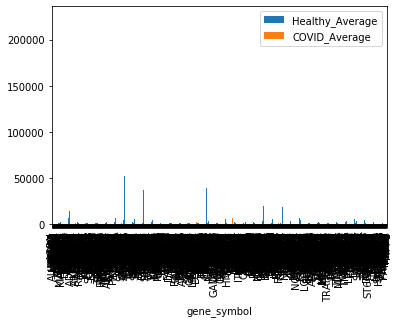

In [241]:
HelCov_df_05_plot.plot (kind = 'bar', x = 'gene_symbol')

This suggest some genes expression to be changed much more than the others, I will try to narrow down this group by lowering alpha first to 0.01 and than to 0.001. If it still is unhelpful I will lower it further.

# Alpha < 0.01

In [217]:
def alphachecker(table, alpha):
    new_table = table[table.p_value <= alpha]
    new_table = new_table.drop(['p_value'], axis = 'columns')
    new_table = new_table[['Healthy_Average', 'COVID_Average', 'gene_symbol']]

    return new_table

In [218]:
 HelCov001 = alphachecker(HelCov_df, 0.01); HelCov001

,Healthy_Average,COVID_Average,gene_symbol
39,1887.0,11.5,AURKAIP1
40,5163.5,1.5,CCNL2
50,2603.0,61.0,SSU72
57,1346.0,65.0,NADK
96,7507.5,118.0,RPL22
...,...,...,...
21303,661.5,1.0,TCEAL8
21456,615.5,20.5,RBMX2
21519,489.5,6.0,ATP11C
21566,3413.0,50.0,IDS


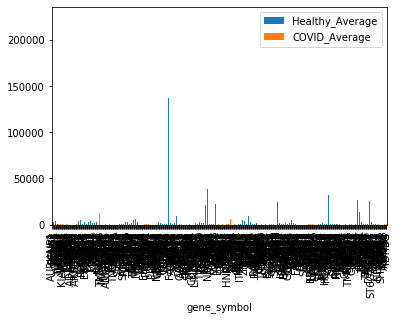

In [244]:
HelCov001.plot (kind = 'bar', x = 'gene_symbol')

It still is a bit messy, going down

# Alpha < 0.001

In [220]:
HelCov0001 = alphachecker(HelCov_df, 0.001); HelCov0001

,Healthy_Average,COVID_Average,gene_symbol
39,1887.0,11.5,AURKAIP1
50,2603.0,61.0,SSU72
96,7507.5,118.0,RPL22
131,3048.5,31.0,SPSB1
372,450.5,4.5,UBXN11
...,...,...,...
20964,1900.5,22.0,NDUFB11
20969,1927.5,20.0,USP11
21002,928.5,5.5,HDAC6
21062,1774.5,17.5,SHROOM4


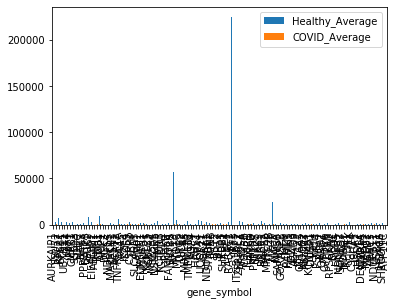

In [243]:
HelCov0001.plot (kind= 'bar', x = 'gene_symbol')

Still messy, lets go deeper

# Alpha < 0.0001

In [248]:
HelCov00001 = alphachecker(HelCov_df, 0.0001); HelCov00001

,Healthy_Average,COVID_Average,gene_symbol
39,1887.0,11.5,AURKAIP1
372,450.5,4.5,UBXN11
3005,4199.0,22.5,RNH1
4069,473.5,5.0,SESN3
6295,1335.5,6.5,ELMSAN1
7302,1740.5,7.5,CRTC3
7428,937.5,4.5,MRPS34
7758,3938.5,14.0,MVP
7855,773.0,6.5,PHKB
8208,57016.0,190.5,RPL13


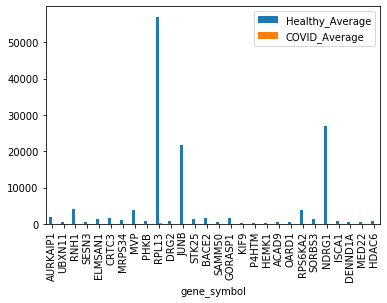

In [246]:
HelCov00001_plot = HelCov00001.plot (kind = 'bar', x = 'gene_symbol')
HelCov00001_plot.set_xlabel = HelCov00001.gene_symbol

# Quick interpretation

All of gene expression with a significant statistical difference was lower in COVID19 patients. 3 main genes were identified: RPL13, NDRG1, JUNB that had their expression supressed significantly, with 3 lesser genes RNH1, MVP, RPS6KA2. Other genes in above graph had their expression altered significantly at the 0.0001 level, but the level of expression was much lower. Further samples should be taken to show wether the results are not a result of a coincidence.